In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
data = pd.read_csv('C:/Users/Akshay/Downloads/50_Startups.csv')

In [4]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# changing type of state column from object to categorical

In [7]:
data['State'] = data['State'].astype('category')

In [8]:
data.groupby('State')['Profit'].sum()

State
California    1766387.98
Florida       1900384.39
New York      1933859.59
Name: Profit, dtype: float64

# getting dummy variables for state column

In [9]:
data = pd.get_dummies(data)

In [10]:
data

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [11]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


# dropping new york column as it has least correlation with Profit

In [12]:
data = data.drop('State_New York', axis  = 1)

In [13]:
data

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1
5,131876.90,99814.71,362861.36,156991.12,0,0
6,134615.46,147198.87,127716.82,156122.51,1,0
7,130298.13,145530.06,323876.68,155752.60,0,1
8,120542.52,148718.95,311613.29,152211.77,0,0
9,123334.88,108679.17,304981.62,149759.96,1,0


In [14]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000


<AxesSubplot:>

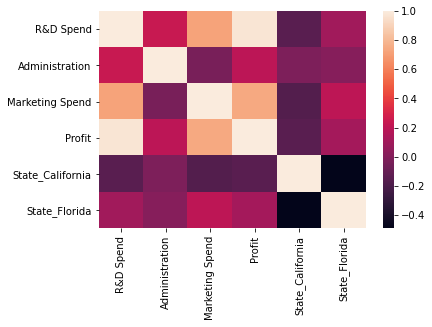

In [15]:
sns.heatmap(data.corr())

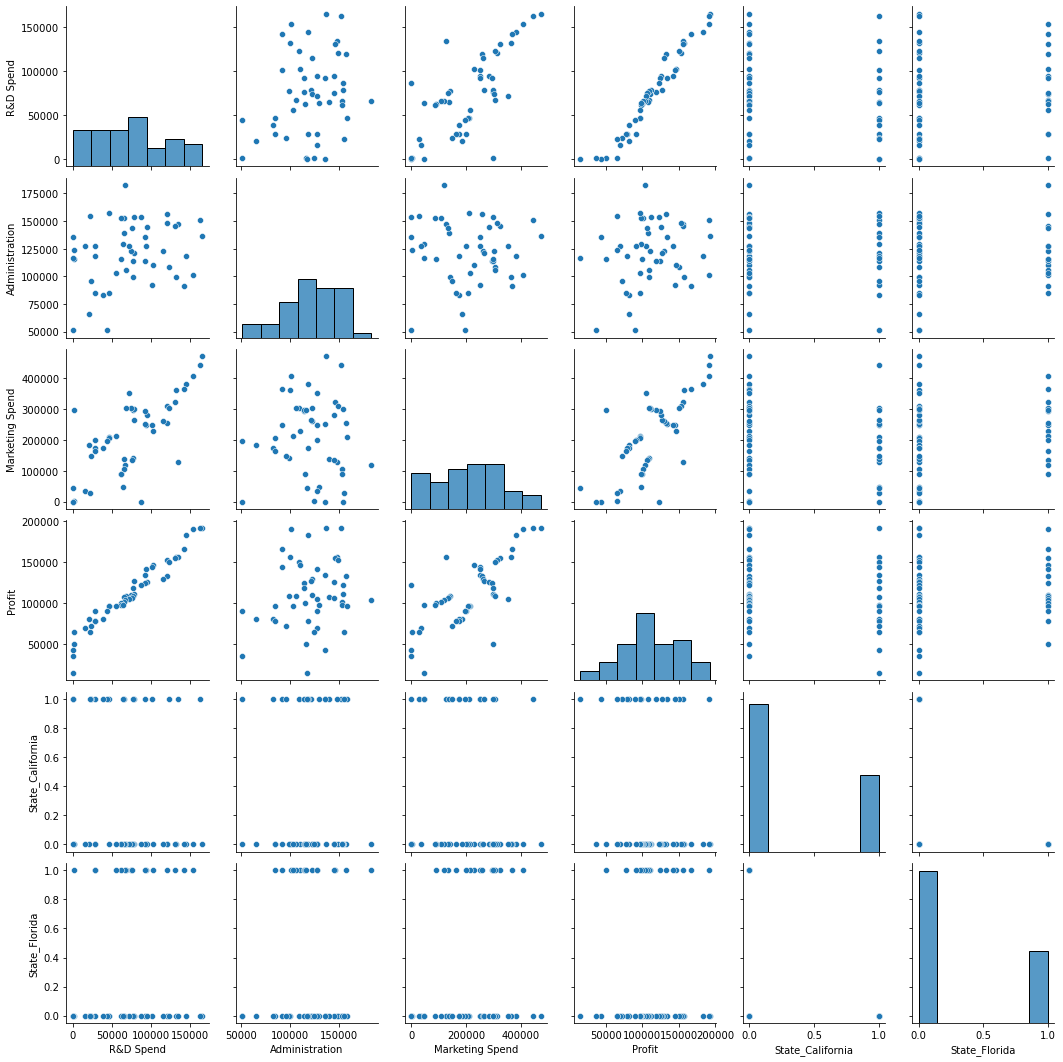

In [16]:
sns.pairplot(data)

# marketing spend and R&D spend have a high correlation
# Florida state is less correlated with profit compared to other independant vairables , followed by Administration
# R&D spend has the highest correlation profit

# defining independant (x) and dependant variables(y)

In [17]:
Y = data['Profit']
X = data.loc[ : , data.columns != 'Profit']

In [18]:
X

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,0,1
5,131876.90,99814.71,362861.36,0,0
6,134615.46,147198.87,127716.82,1,0
7,130298.13,145530.06,323876.68,0,1
8,120542.52,148718.95,311613.29,0,0
9,123334.88,108679.17,304981.62,1,0


In [19]:
Y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [20]:
data.rename({'Marketing Spend' : 'Marketing'} , axis = 1 , inplace = True)

In [21]:
data.rename({'Administration' : 'Admin'} , axis = 1 , inplace = True)

In [22]:
data.rename({'State_California' : 'SC'} , axis = 1 , inplace = True)

In [23]:
data.rename({'State_Florida' : 'SF'} , axis = 1 , inplace = True)

In [24]:
data.rename({'R&D Spend' : 'RD'} , axis = 1 , inplace = True)

In [25]:
data

,RD,Admin,Marketing,Profit,SC,SF
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1
5,131876.90,99814.71,362861.36,156991.12,0,0
6,134615.46,147198.87,127716.82,156122.51,1,0
7,130298.13,145530.06,323876.68,155752.60,0,1
8,120542.52,148718.95,311613.29,152211.77,0,0
9,123334.88,108679.17,304981.62,149759.96,1,0


# Builidng the model

MODEL 1

In [26]:
model = smf.ols('Profit~RD+Admin+Marketing+SC+SF',data = data).fit()

In [27]:
model.rsquared

0.9507524843355148

 MODEL 2

In [28]:
model = smf.ols('Profit~RD+Admin+Marketing',data = data).fit()

In [29]:
model.rsquared

0.9507459940683246

# continuing with model 2 because adding SC and SF variables makes not much difference in the r squared values

In [30]:
model = smf.ols('Profit~RD+Admin+Marketing+SC+SF',data = data).fit()

In [31]:
model.fittedvalues

0     192390.571364
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133819
5     163473.807120
6     158099.292788
7     160155.644651
8     151634.743327
9     154829.662529
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248986
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725743
19    115594.188410
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796104
24    113294.373453
25    102200.268919
26    110765.301170
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236605
33     98061.358947
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746174
41     74956.311047
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364709
46     56272.992680
47     46468.232003
48     49123.073082
49     48185.038791


In [32]:
model.pvalues

Intercept    5.757175e-09
RD           2.578772e-21
Admin        6.077373e-01
Marketing    1.226769e-01
SC           9.897941e-01
SF           9.428623e-01
dtype: float64

In [33]:
np.round(model.pvalues['Admin'] , 4)

0.6077

In [34]:
np.round(model.pvalues['Marketing'] , 4)

0.1227

In [35]:
np.round(model.pvalues['SC'] , 4)

0.9898

In [36]:
np.round(model.pvalues['SF'] , 4)

0.9429

# building linear models with those variables whose P value greater than 0.05 and profit

In [37]:
model = smf.ols('Profit~Admin' , data = data).fit()

In [38]:
model.rsquared

0.04028714077757223

<AxesSubplot:xlabel='Admin', ylabel='Profit'>

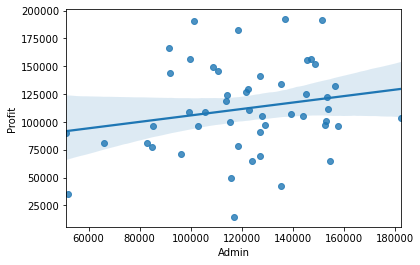

In [39]:
sns.regplot(x = 'Admin' , y = 'Profit' , data = data)

In [40]:
model = smf.ols('Profit~Marketing' , data = data).fit()

In [41]:
model.rsquared

0.5591535746115515

<AxesSubplot:xlabel='Marketing', ylabel='Profit'>

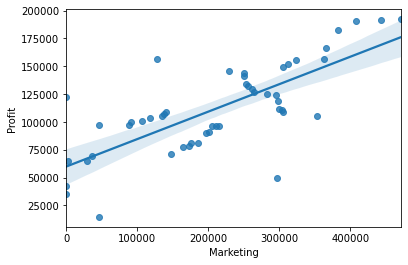

In [42]:
sns.regplot(x = 'Marketing' , y = 'Profit' , data = data)

In [43]:
model = smf.ols('Profit~SF' , data = data).fit()

In [44]:
model.rsquared

0.013512728677721686

In [45]:
model = smf.ols('Profit~SC' , data = data).fit()

In [46]:
model.rsquared

0.021268441461162024

# since SF has a very high P value for its slope as well as least linear correlation with Profit , dropping that variable

In [47]:
data = data.drop('SF' , axis = 1)

In [48]:
model = smf.ols('Profit~RD+Admin+Marketing+SC',data = data).fit()

In [49]:
model.rsquared

0.9507466686514052

# profit has much better correlation with Marketing than compared to Admin

# Validation methods

# 1. checking vif factor

In [51]:
R_RD = smf.ols('RD~Admin+Marketing+SC' , data = data).fit().rsquared
vif_RD = 1/(1-R_RD)
vif_RD

2.4703745766185423

In [52]:
R_Admin = smf.ols('Admin~RD+Marketing+SC' , data = data).fit().rsquared
vif_Admin = 1/(1-R_Admin)
vif_Admin

1.175213342574746

In [53]:
R_M = smf.ols('Marketing~RD+Admin+SC' , data = data).fit().rsquared
vif_M = 1/(1-R_M)
vif_M

2.3475090136376275

In [54]:
R_SC = smf.ols('SC~RD+Admin+Marketing' , data = data).fit().rsquared
vif_SC = 1/(1-R_SC)
vif_SC

1.0304337121541793

In [55]:
vif_table = pd.DataFrame({'X_variables': ['RD' , 'Admin' , 'Marketing' , 'SC'] , 'vif':['2.47' , '1.17' , '2.34' , '1.03']})

In [56]:
vif_table

,X_variables,vif
0,RD,2.47
1,Admin,1.17
2,Marketing,2.34
3,SC,1.03


# All vif factors seems to be at a good level , so we can be confident that multi collinearity is not a problem in our model

# 2. checking normality of residuals

In [58]:
model.resid

0      -270.396992
1      2693.570257
2      8888.851194
3      9190.044210
4     -5967.903026
5     -6606.291279
6     -1946.462123
7     -4286.359669
8       451.767419
9     -5073.505023
10    10590.403015
11     8733.905222
12    12425.737178
13     6868.021397
14   -16966.361376
15   -16338.873220
16    10126.074642
17    -4842.275784
18    -4767.528443
19     7110.312286
20     1884.098896
21    -6026.297587
22    -4374.984628
23    -1283.222986
24    -4837.745794
25     5210.103748
26    -4893.570633
27    -9418.056370
28     1595.445445
29     -818.080529
30      456.267458
31     -232.898840
32    -1533.751468
33    -1160.567365
34     7719.586779
35     5942.577839
36    15396.580660
37      373.670275
38    11504.544347
39    -2679.780970
40     3467.534654
41     2968.835377
42      920.256666
43     9559.690495
44      627.214372
45    17241.426318
46    -6698.053369
47    -3894.591036
48   -13533.015349
49   -33495.946284
dtype: float64

In [59]:
import statsmodels.api as sm

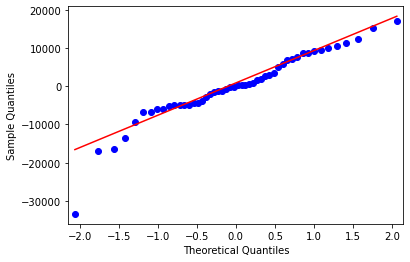

In [60]:
qqplot = sm.qqplot(model.resid , line = 'q')

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

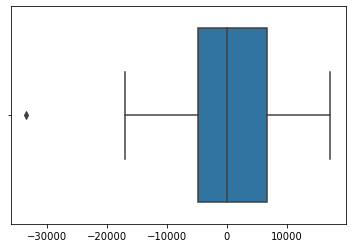

In [61]:
sns.boxplot(model.resid)

# Trying to find the most influential point

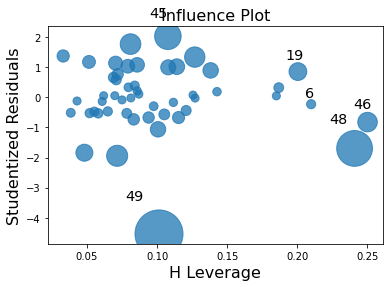

In [62]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

# we can see that the 49th observation is the outlier , so we can drop it

In [63]:
data.iloc[49,:] 

RD                0.00
Admin        116983.80
Marketing     45173.06
Profit        14681.40
SC                1.00
Name: 49, dtype: float64

In [64]:
data = data.drop(data.index[49] , axis = 0)

In [65]:
data = data.reset_index()

In [66]:
data = data.drop('index' , axis = 1)

In [67]:
data

,RD,Admin,Marketing,Profit,SC
0,165349.20,136897.80,471784.10,192261.83,0
1,162597.70,151377.59,443898.53,191792.06,1
2,153441.51,101145.55,407934.54,191050.39,0
3,144372.41,118671.85,383199.62,182901.99,0
4,142107.34,91391.77,366168.42,166187.94,0
5,131876.90,99814.71,362861.36,156991.12,0
6,134615.46,147198.87,127716.82,156122.51,1
7,130298.13,145530.06,323876.68,155752.60,0
8,120542.52,148718.95,311613.29,152211.77,0
9,123334.88,108679.17,304981.62,149759.96,1


# FINAL MODEL 1

In [68]:
model = smf.ols('Profit~RD+Admin+Marketing+SC',data = data).fit()

In [69]:
model.rsquared

0.9617909250655107

In [70]:
R1 = pd.DataFrame({'Model no.' : '1' , 'R_squared' : '0.962'} , index = [0])

In [71]:
R1

,Model no.,R_squared
0,1,0.962


In [72]:
model.fittedvalues

0     190388.505989
1     188961.393775
2     180171.081357
3     172041.380256
4     170415.246578
5     162134.625845
6     158869.195952
7     158884.636220
8     150855.322650
9     155510.643791
10    134939.329235
11    136686.492807
12    128813.588782
13    129016.162922
14    148774.412240
15    145405.905397
16    118677.351614
17    129905.178989
18    128622.833636
19    115879.133739
20    118365.605869
21    117426.635844
22    114752.640920
23    110100.717899
24    113393.998476
25    104528.228684
26    110905.100694
27    114469.044535
28    102387.218405
29    102393.734934
30     99960.266330
31     98406.406675
32    101365.938468
33     98374.478565
34     91757.391401
35     91104.218449
36     76489.870314
37     91865.658678
38     70799.032247
39     86284.436545
40     77776.408301
41     75847.932170
42     73609.742923
43     61847.363071
44     68059.116489
45     49679.197001
46     57830.108369
47     50372.811776
48     50844.834186
dtype: float64

In [73]:
model.resid

0      1873.324011
1      2830.666225
2     10879.308643
3     10860.609744
4     -4227.306578
5     -5143.505845
6     -2746.685952
7     -3132.036220
8      1356.447350
9     -5750.683791
10    11182.620765
11     7572.907193
12    12771.931218
13     5291.187078
14   -16171.762240
15   -15488.865397
16     8315.578386
17    -4534.808989
18    -4355.933636
19     6897.726261
20      108.424131
21    -6113.615844
22    -4400.390920
23    -1366.727899
24    -4841.958476
25     2876.111316
26    -5171.560694
27    -9460.734535
28      895.161595
29    -1389.094934
30      -22.676330
31     -922.846675
32    -3938.098468
33    -1595.558565
34     4955.408599
35     5375.291551
36    14218.319686
37    -1916.518678
38    10430.027753
39    -5278.676545
40      463.501699
41     1950.897830
42    -2111.252923
43     7911.616929
44    -2858.786489
45    15246.882999
46    -8339.358369
47    -7813.081776
48   -15171.424186
dtype: float64

In [74]:
data['Predicted'] = model.fittedvalues
data['Errors'] = model.resid

In [75]:
data

,RD,Admin,Marketing,Profit,SC,Predicted,Errors
0,165349.20,136897.80,471784.10,192261.83,0,190388.505989,1873.324011
1,162597.70,151377.59,443898.53,191792.06,1,188961.393775,2830.666225
2,153441.51,101145.55,407934.54,191050.39,0,180171.081357,10879.308643
3,144372.41,118671.85,383199.62,182901.99,0,172041.380256,10860.609744
4,142107.34,91391.77,366168.42,166187.94,0,170415.246578,-4227.306578
5,131876.90,99814.71,362861.36,156991.12,0,162134.625845,-5143.505845
6,134615.46,147198.87,127716.82,156122.51,1,158869.195952,-2746.685952
7,130298.13,145530.06,323876.68,155752.60,0,158884.636220,-3132.036220
8,120542.52,148718.95,311613.29,152211.77,0,150855.322650,1356.447350
9,123334.88,108679.17,304981.62,149759.96,1,155510.643791,-5750.683791


# checking normality of residuals again

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

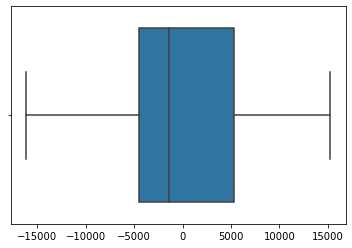

In [76]:
sns.boxplot(model.resid)

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
data1 = data.copy()

In [79]:
data1

,RD,Admin,Marketing,Profit,SC,Predicted,Errors
0,165349.20,136897.80,471784.10,192261.83,0,190388.505989,1873.324011
1,162597.70,151377.59,443898.53,191792.06,1,188961.393775,2830.666225
2,153441.51,101145.55,407934.54,191050.39,0,180171.081357,10879.308643
3,144372.41,118671.85,383199.62,182901.99,0,172041.380256,10860.609744
4,142107.34,91391.77,366168.42,166187.94,0,170415.246578,-4227.306578
5,131876.90,99814.71,362861.36,156991.12,0,162134.625845,-5143.505845
6,134615.46,147198.87,127716.82,156122.51,1,158869.195952,-2746.685952
7,130298.13,145530.06,323876.68,155752.60,0,158884.636220,-3132.036220
8,120542.52,148718.95,311613.29,152211.77,0,150855.322650,1356.447350
9,123334.88,108679.17,304981.62,149759.96,1,155510.643791,-5750.683791


In [80]:
array = data1.values

In [81]:
scaler = StandardScaler().fit(array)
scaled = scaler.transform(array)

In [82]:
scaled

array([[ 2.01832469e+00,  5.52079905e-01,  2.14611996e+00,
         2.07155597e+00, -6.96310624e-01,  2.06174281e+00,
         2.53670937e-01],
       [ 1.95670428e+00,  1.06901708e+00,  1.91359564e+00,
         2.05912153e+00,  1.43614066e+00,  2.02322525e+00,
         3.83306758e-01],
       [ 1.75164950e+00, -7.24296833e-01,  1.61370926e+00,
         2.03949011e+00, -6.96310624e-01,  1.78597589e+00,
         1.47319118e+00],
       [ 1.54854512e+00, -9.85974260e-02,  1.40745668e+00,
         1.82380835e+00, -6.96310624e-01,  1.56655634e+00,
         1.47065912e+00],
       [ 1.49781841e+00, -1.07251262e+00,  1.26544171e+00,
         1.38140055e+00, -6.96310624e-01,  1.52266721e+00,
        -5.72428909e-01],
       [ 1.26870558e+00, -7.71808618e-01,  1.23786573e+00,
         1.13796794e+00, -6.96310624e-01,  1.29917436e+00,
        -6.96493473e-01],
       [ 1.33003620e+00,  9.19834274e-01, -7.22891254e-01,
         1.11497651e+00,  1.43614066e+00,  1.21104084e+00,
        -3.7193480

In [83]:
scaledata = pd.DataFrame(scaled , columns = ['RD','Admin','Marketing','Profit','SC','Predicted','Errors'])

In [84]:
scaledata

,RD,Admin,Marketing,Profit,SC,Predicted,Errors
0,2.018325,0.552080,2.146120,2.071556,-0.696311,2.061743,0.253671
1,1.956704,1.069017,1.913596,2.059122,1.436141,2.023225,0.383307
2,1.751650,-0.724297,1.613709,2.039490,-0.696311,1.785976,1.473191
3,1.548545,-0.098597,1.407457,1.823808,-0.696311,1.566556,1.470659
4,1.497818,-1.072513,1.265442,1.381401,-0.696311,1.522667,-0.572429
5,1.268706,-0.771809,1.237866,1.137968,-0.696311,1.299174,-0.696493
6,1.330036,0.919834,-0.722891,1.114977,1.436141,1.211041,-0.371935
7,1.233349,0.860257,0.912791,1.105185,-0.696311,1.211458,-0.424116
8,1.014870,0.974102,0.810533,1.011462,-0.696311,0.994747,0.183680
9,1.077405,-0.455342,0.755234,0.946565,1.436141,1.120394,-0.778713


# Residual Plot for Homoscedasticity

# Fitted vs residuals

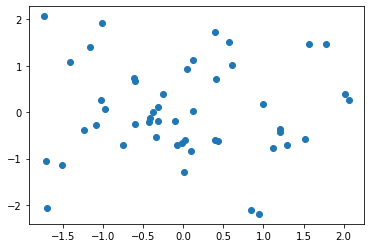

In [85]:
plt.scatter(x = scaledata['Predicted'] , y = scaledata['Errors'])

# Regressors vs residuals

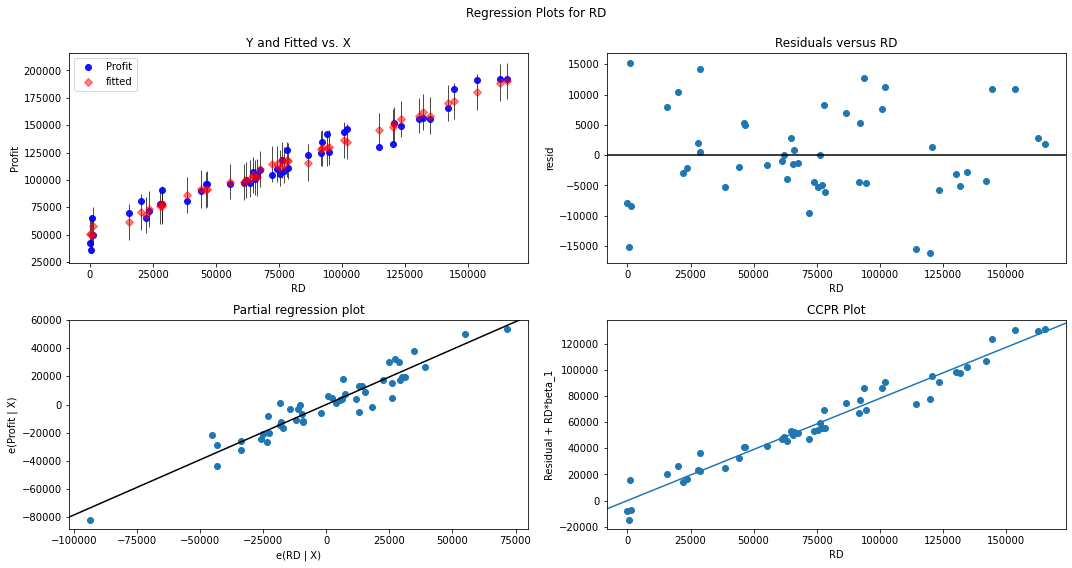

In [86]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()


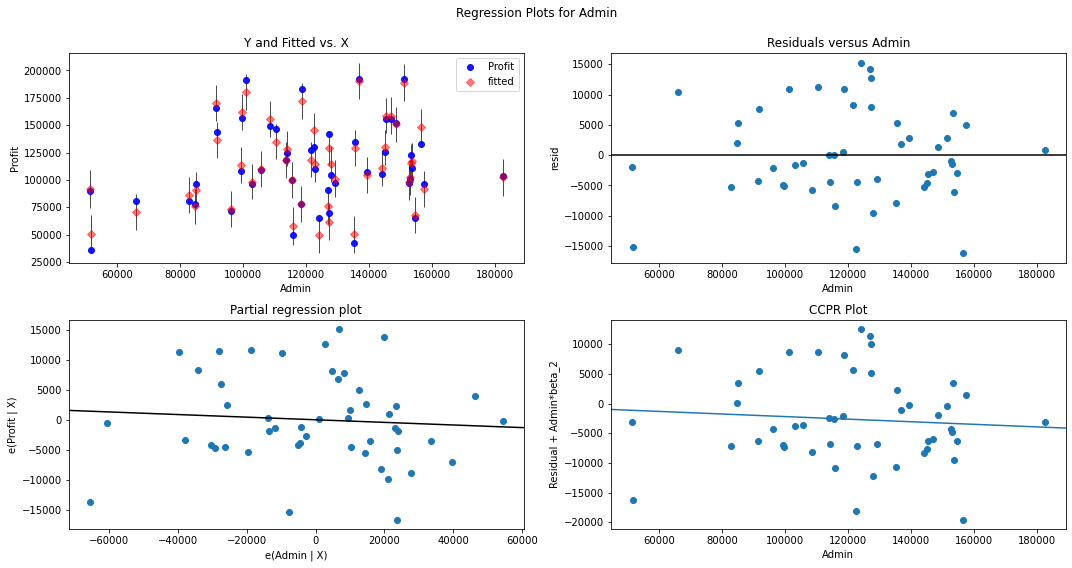

In [87]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Admin", fig=fig)
plt.show()

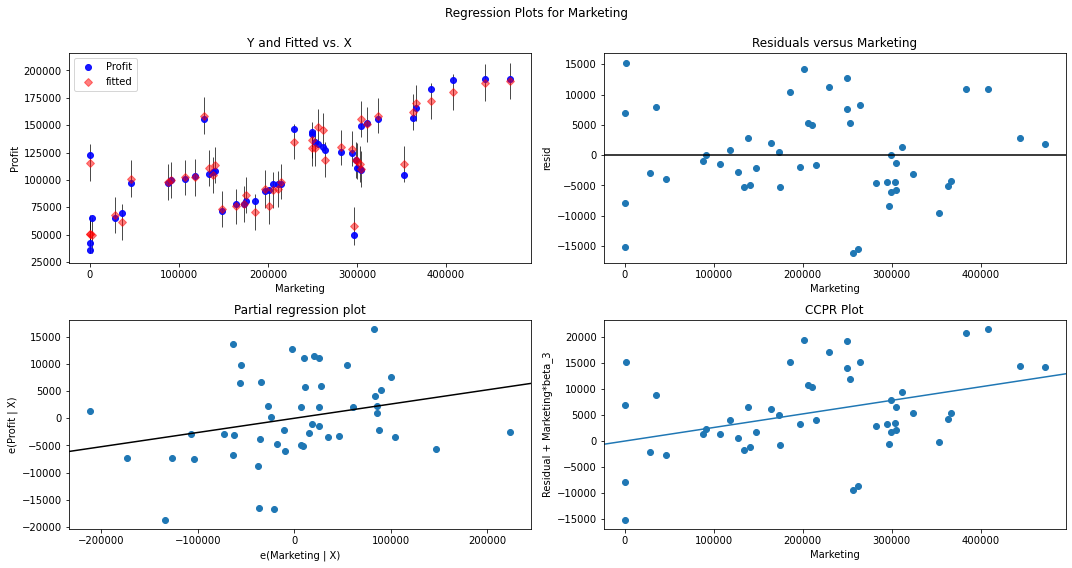

In [88]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing", fig=fig)
plt.show()

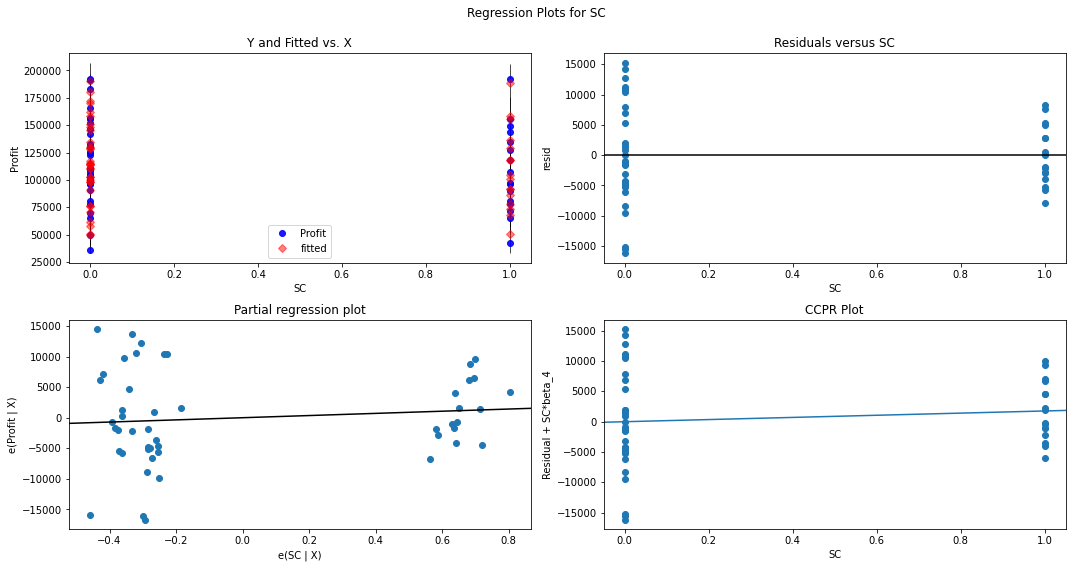

In [89]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "SC", fig=fig)
plt.show()

In [90]:
model.rsquared

0.9617909250655107

# using transformations to get a better rsqaure

# FINAL MODEL 2

In [91]:
sq_x = np.sqrt(data[['RD', 'Marketing', 'Admin', 'SC']])

In [92]:
model = smf.ols('Profit~sq_x',data = data).fit()

In [93]:
model.rsquared

0.8960551116661994

In [94]:
R2 = pd.DataFrame({'Model no.' : '2' , 'R_squared' : '0.896'} , index = [0])

In [95]:
R2

,Model no.,R_squared
0,2,0.896


# FINAL MODEL 3

In [96]:
sq_y = np.sqrt(data['Profit'])

In [97]:
model = smf.ols('sq_y~RD+Admin+Marketing+SC',data = data).fit()

In [98]:
model.rsquared

0.9449341527313939

In [99]:
R3 = pd.DataFrame({'Model no.' : '3' , 'R_squared' : '0.945'} , index = [0])

In [100]:
R3

,Model no.,R_squared
0,3,0.945


# FINAL MODEL 4

In [102]:
model = smf.ols('sq_y~sq_x',data = data).fit()

In [103]:
model.rsquared

0.9375368202288077

In [104]:
R4 = pd.DataFrame({'Model no.' : '4' , 'R_squared' : '0.938'} , index = [0])

In [105]:
R4

,Model no.,R_squared
0,4,0.938


# Concluding that Final model 1 is the best model as it gives highest R squared value